<a href="https://colab.research.google.com/github/vieweghn/EENG-310-Signals-and-Systems/blob/main/EENG_310_HW09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A. The fourier series of the periodic waveform (a) $f_1(t)$ below is given by:

$$ f_1(t) = 10 - \frac{20}{\pi} \sum_{n=1}^{\infty} \frac{1}{n} \sin\left(\frac{n\pi t}{2}\right). $$

Determine the Fourier series of the waveform (b) below.

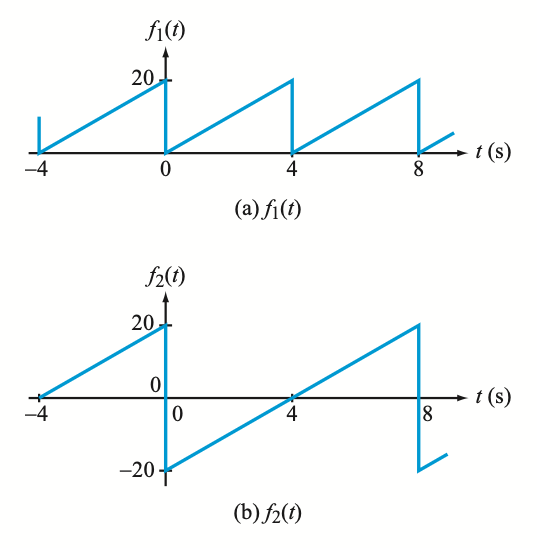

B. The current source $i_s(t)$ in the circuit below generates a sawtooth wave (see more below) with a peak amplitude of $20\mathrm{~mA}$ and a period of $T=\mathrm{~5ms}$.

1. Derive the Fourier series representation of $v_{\mathrm out}(t)$
2. Calculate the first five terms of $v_{\mathrm out}(t)$ using $R_1=500~\mathrm{\Omega}$, $R_2=2~\mathrm{k\Omega}$, and $C=0.33\mathrm{~\mu F}$.
3. Plot $v_\mathrm{out}(t)$, and $i_s(t)$ using $n_\mathrm{max}=100$.

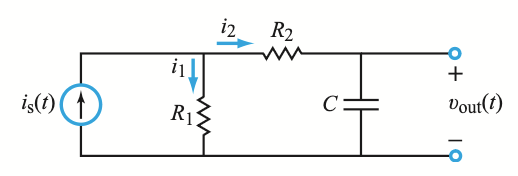

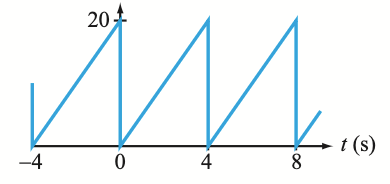

Here's what I got for the first 5 Fourier terms:

```
Term: n=0:   5.000 (DC)
Term: n=1:  -2.210 sin( 1260t + -46.0 deg)
Term: n=2:  -0.691 sin( 2510t + -64.3 deg)
Term: n=3:  -0.325 sin( 3770t + -72.2 deg)
Term: n=4:  -0.187 sin( 5030t + -76.4 deg)
```

The output should look like this when you're done.


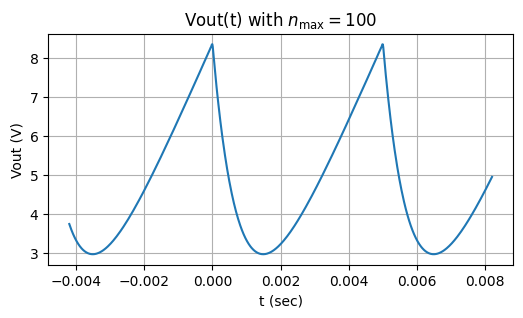

C. Voltage source $v_s(t)$ in the circuit below has the waveform displayed below.

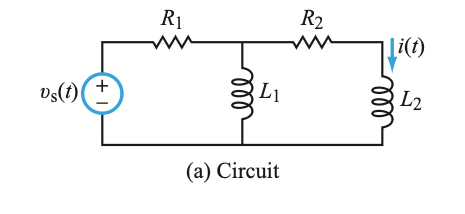

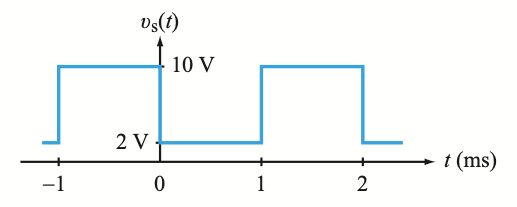

1. Derive the Fourier series representation of $i(t)$.
2. Calculate the first five terms of $i(t)$ using:

$$ R_1 = R_2 = 10\mathrm{~\Omega} \text{ and } L_1=L_2=10\mathrm{~mH}$$
3. Plot $i(t)$ and $v_s(t)$ using $n_\mathrm{max}=100$.

Here's what I got for the first five Fourier terms:

```
Term: n=1:  -0.124 sin( 3140t + -43.3 deg)
Term: n=3:  -0.017 sin( 9420t + -72.2 deg)
Term: n=5:  -0.006 sin(15700t + -79.1 deg)

n=0,2,4,6... are all zero

```

The correct output looks like this:

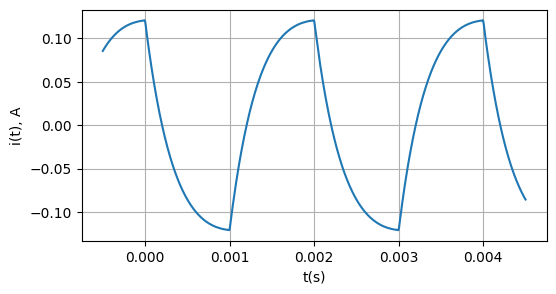